<a href="https://colab.research.google.com/github/DIWEERAPURA/Nature-Inspired-Computing-Algorithms---Real-world-Usage/blob/main/PSO_Real_TIme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.8 MB/s eta 0:00:00


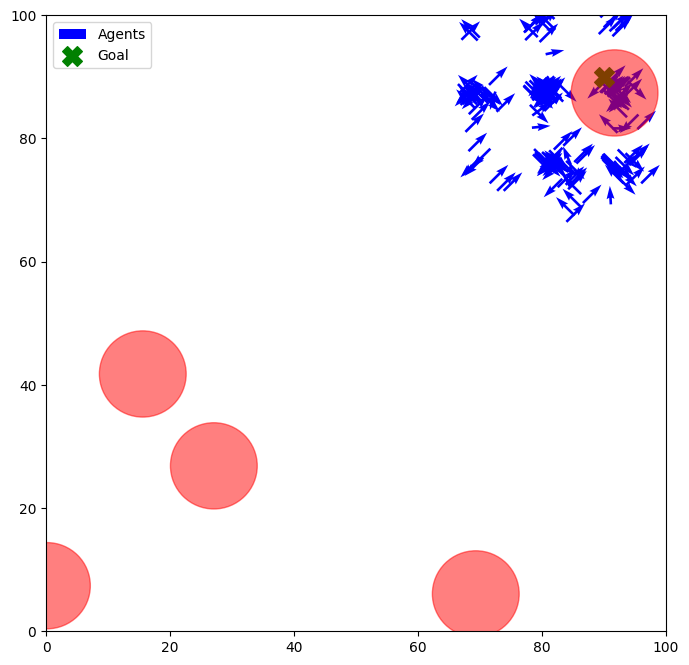

In [2]:
!pip install biopython

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import subprocess
from Bio import SeqIO

# Parameters
NUM_AGENTS = 200
ITERATIONS = 20
BOUNDARY = 100
GOAL = np.array([90, 90])  # Goal position
OBSTACLE_COUNT = 5

# PSO parameters
W = 0.5         # Inertia weight
C1 = 1.5        # Cognitive component
C2 = 1.5        # Social component
VELOCITY_LIMIT = 3

# Agent behavior weights
COHESION_WEIGHT = 1.0
SEPARATION_WEIGHT = 2.0
ALIGNMENT_WEIGHT = 1.0
GOAL_ATTRACTION_WEIGHT = 2.5
AVOID_OBSTACLE_WEIGHT = 3.0

# Initialize agents
agents = np.random.rand(NUM_AGENTS, 2) * BOUNDARY  # Agent positions
velocities = np.random.rand(NUM_AGENTS, 2) * VELOCITY_LIMIT  # Agent velocities
personal_best_positions = np.copy(agents)
global_best_position = GOAL

# Generate obstacles
obstacles = np.random.rand(OBSTACLE_COUNT, 2) * BOUNDARY
OBSTACLE_RADIUS = 7

# Helper functions
def distance(a, b):
    """Calculate the Euclidean distance between points a and b."""
    return np.linalg.norm(a - b, axis=1)

def cohesion(agents):
    """Calculate cohesion force (moving towards the center of mass)."""
    center_of_mass = np.mean(agents, axis=0)
    return center_of_mass - agents

def separation(agents):
    """Calculate separation force (avoiding nearby agents)."""
    force = np.zeros_like(agents)
    for i, agent in enumerate(agents):
        for j, neighbor in enumerate(agents):
            if i != j and np.linalg.norm(agent - neighbor) < 5:
                force[i] -= (neighbor - agent)
    return force

def alignment(agents, velocities):
    """Calculate alignment force (matching group velocity)."""
    avg_velocity = np.mean(velocities, axis=0)
    return avg_velocity - velocities

def avoid_obstacles(agents, obstacles):
    """Calculate obstacle avoidance force."""
    avoidance = np.zeros_like(agents)
    for i, agent in enumerate(agents):
        for obs in obstacles:
            dist = np.linalg.norm(agent - obs)
            if dist < OBSTACLE_RADIUS:
                avoidance[i] += (agent - obs) / dist**2
    return avoidance

def attraction_to_goal(agents, goal):
    """Calculate attraction force towards the goal."""
    return goal - agents

def update_velocity(vel, pos, personal_best, global_best):
    """Update the velocity of agents using PSO formula."""
    inertia = W * vel
    cognitive = C1 * np.random.rand(*vel.shape) * (personal_best - pos)
    social = C2 * np.random.rand(*vel.shape) * (global_best - pos)
    new_velocity = inertia + cognitive + social
    return np.clip(new_velocity, -VELOCITY_LIMIT, VELOCITY_LIMIT)

def update_positions(pos, vel):
    """Update positions of agents."""
    new_positions = pos + vel
    return np.clip(new_positions, 0, BOUNDARY)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, BOUNDARY)
ax.set_ylim(0, BOUNDARY)

# Plot elements
agent_quiver = ax.quiver(agents[:, 0], agents[:, 1], velocities[:, 0], velocities[:, 1],
                         angles='xy', scale_units='xy', scale=1, color='blue', label='Agents')
goal_marker = ax.scatter(GOAL[0], GOAL[1], c='green', s=200, marker='X', label='Goal')  # Larger icon
obstacle_circles = []

for obs in obstacles:
    circle = plt.Circle(obs, OBSTACLE_RADIUS, color='red', alpha=0.5)
    ax.add_artist(circle)
    obstacle_circles.append(circle)

ax.legend()

# Update function for animation
def update(frame):
    global agents, velocities, personal_best_positions

    # Calculate forces
    cohesion_force = COHESION_WEIGHT * cohesion(agents)
    separation_force = SEPARATION_WEIGHT * separation(agents)
    alignment_force = ALIGNMENT_WEIGHT * alignment(agents, velocities)
    goal_force = GOAL_ATTRACTION_WEIGHT * attraction_to_goal(agents, GOAL)
    obstacle_force = AVOID_OBSTACLE_WEIGHT * avoid_obstacles(agents, obstacles)

    # Update velocities
    velocities += cohesion_force + separation_force + alignment_force + goal_force + obstacle_force
    velocities = np.clip(velocities, -VELOCITY_LIMIT, VELOCITY_LIMIT)

    # Update positions
    agents = update_positions(agents, velocities)

    # Update personal best positions
    for i, agent in enumerate(agents):
        if np.linalg.norm(agent - GOAL) < np.linalg.norm(personal_best_positions[i] - GOAL):
            personal_best_positions[i] = agent

    # Update quiver plot
    agent_quiver.set_offsets(agents)
    agent_quiver.set_UVC(velocities[:, 0], velocities[:, 1])

# Create animation
ani = FuncAnimation(fig, update, frames=ITERATIONS, interval=50, repeat=False)

# Display the animation in Colab
HTML(ani.to_jshtml())
